In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from Helpers.image_helper import load_image_from_file
from Helpers.image_helper import save_image
import os
import numpy as np

In [34]:
image_paths =[
    "../Images/Data/SIW/original/ASUS/img00000003.png",
    "../Images/Data/SIW/original/IP7P/img00000020.png",
    "../Images/Data/SIW/original/IPP2017/img00000022.png",
    "../Images/Data/SIW/original/SGS8/img00000015.png",
    "../Images/Data/SIW/original/P/img00000052.png",
    ]

gan_image_paths =[
    "../Images/Data/SIW/gan/ASUS/frame_47.png",
    "../Images/Data/SIW/gan/IP7P/frame_10.png",
    "../Images/Data/SIW/gan/IPP2017/frame_12.png",
    "../Images/Data/SIW/gan/SGS8/frame_4.png",
    "../Images/Data/SIW/gan/P/frame_19.png",
    ]

traditional_image_paths = [
    "././traditional/ASUS_0.png",
    "./traditional/IP7P_1.png",
    "./traditional/IPP2017_2.png",
    "./traditional/SGS8_3.png",
    "./traditional/P_4.png",
]

all_images = []
for i in range(len(image_paths)):
    all_images.append(image_paths[i])
    all_images.append(traditional_image_paths[i])
    all_images.append(gan_image_paths[i])

In [36]:
from Helpers.image_helper import create_image_grid_from_paths

create_image_grid_from_paths(all_images,class_names=None, file_name=f"DataAug.png", title=None, must_show=False,num_cols=3, fontsize=10, scale=2)

'DataAug.png'

In [31]:
degrees = 15
percentage = (degrees * (math.pi/180.0) )/ (2*math.pi)
data_augmentation = tf.keras.Sequential(
        [
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(percentage, fill_mode="constant"),
            tf.keras.layers.RandomZoom((-0.2, 0)),
        ]
    )


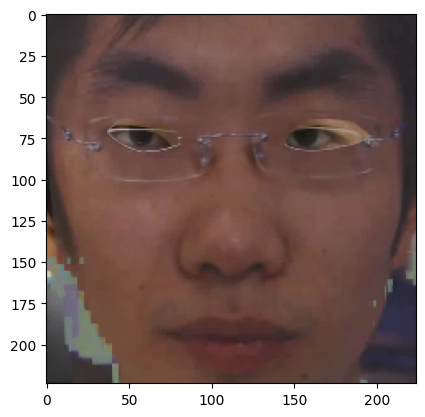

In [18]:
plt.style.use('default')
image = load_image_from_file("frame_1.png", desired_shape=(224,224)).numpy()
plt.imshow(image/255)

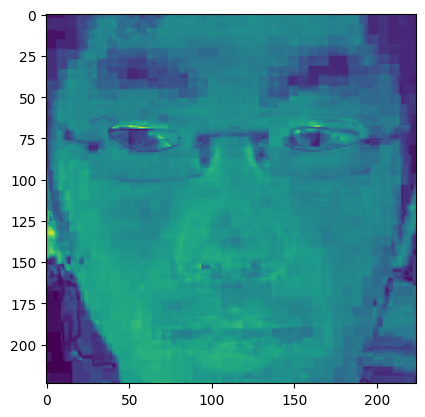

In [19]:
plt.imshow(np.array(tf.image.rgb_to_hsv(image).numpy()[:,:,1]))

In [ ]:
plt.imshow(tf.image.rgb_to_hsv(image.numpy()))

In [32]:
def save_traditional(save_path, file_paths, num_images_to_generate=1):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    images = [load_image_from_file(file_path, desired_shape=(224,224)) for
              file_path in file_paths]
    augmented = []
    image_counter = 0
    for gen_counter in range(0, num_images_to_generate):
        for img in images:
            augmented.append(data_augmentation(np.array(img)).numpy())
    for index, image in enumerate(augmented):
        vec = os.path.basename(os.path.dirname(file_paths[index]))
        save_image(image, os.path.join(save_path, f"{vec}_{image_counter}.png"))
        image_counter += 1

In [33]:
save_traditional("./traditional/", image_paths)

In [ ]:

    # get the frames for the directory
    file_paths = obtain_file_paths(os.path.join(dataset_root,row['directory_path']), "^frame")
    random.shuffle(file_paths)

    # flipped_images = tf.image.flip_left_right(images).numpy()
    augmented = []
    for gen_counter in range(0, num_images_to_generate):
        augmented.append(data_augmentation(np.array(images[gen_counter%len(images)])).numpy())
    for image in augmented:
        save_image(image, os.path.join(save_path, f"frame_{image_counter}.png"))
        image_counter += 1